In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_mean_validation_auc, rolling_min_dev_auc, top_min_whole_validation_auc,\
    top_min_dev_auc, top_min_validation_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/bagging-switch-narrow.pkl']

In [5]:
top_k = 100000
min_iterations = 100

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

332

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_min_dev.groupby(['file', 'experiment_id']).ngroups

350

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
true_best.groupby(['file', 'experiment_id']).ngroups

294

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               90034.0  0.809092  0.000621  0.808430  0.808616   
mean_validation_auc        90034.0  0.792372  0.001280  0.788551  0.791392   
mean_whole_validation_auc  90034.0  0.798697  0.008260  0.696945  0.792595   
min_dev_auc                90034.0  0.797404  0.001082  0.793198  0.796754   
min_validation_auc         90034.0  0.789989  0.001242  0.782288  0.789145   
min_whole_validation_auc   90034.0  0.798101  0.009458  0.650028  0.792163   

                                50%       75%       max  
mean_dev_auc               0.808894  0.809409  0.811750  
mean_validation_auc        0.792171  0.793324  0.795923  
mean_whole_validation_auc  0.793889  0.807114  0.811523  
min_dev_auc                0.797437  0.798099  0.800848  
min_validation_auc         0.789942  0.790781  0.793623  
min_whole_validation_auc   0.793498  0.806601  0.811155

In [11]:
best_mean_dev.min_whole_validation_auc.corr(best_mean_dev.mean_dev_auc, method='spearman')

0.2634377888724434

In [12]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               86923.0  0.808586  0.000972  0.804850  0.808059   
mean_validation_auc        86923.0  0.791143  0.001787  0.784506  0.790056   
mean_whole_validation_auc  86923.0  0.797981  0.009229  0.696385  0.791465   
min_dev_auc                86923.0  0.798042  0.000597  0.797305  0.797584   
min_validation_auc         86923.0  0.788904  0.001844  0.780467  0.787720   
min_whole_validation_auc   86923.0  0.797354  0.010632  0.650028  0.790988   

                                50%       75%       max  
mean_dev_auc               0.808544  0.809112  0.811750  
mean_validation_auc        0.791250  0.792224  0.795788  
mean_whole_validation_auc  0.793403  0.807475  0.811523  
min_dev_auc                0.797883  0.798358  0.800848  
min_validation_auc         0.789102  0.790146  0.793610  
min_whole_validation_auc   0.793053  0.807000  0.811155

In [13]:
best_min_dev.min_whole_validation_auc.corr(best_min_dev.min_dev_auc, method='spearman')

0.19477837424043679

In [14]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               94040.0  0.804428  0.004281  0.779829  0.800547   
mean_validation_auc        94040.0  0.783619  0.007443  0.753172  0.776628   
mean_whole_validation_auc  94040.0  0.809325  0.000829  0.807680  0.808663   
min_dev_auc                94040.0  0.792565  0.005471  0.764416  0.788050   
min_validation_auc         94040.0  0.781356  0.007486  0.747873  0.774307   
min_whole_validation_auc   94040.0  0.808859  0.000821  0.807643  0.808198   

                                50%       75%       max  
mean_dev_auc               0.805779  0.808169  0.811750  
mean_validation_auc        0.785048  0.790444  0.795536  
mean_whole_validation_auc  0.809236  0.809861  0.812614  
min_dev_auc                0.794971  0.796924  0.800678  
min_validation_auc         0.782493  0.788314  0.793610  
min_whole_validation_auc   0.808731  0.809363  0.812227

In [15]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

76

In [16]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(13975, 99)

In [17]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

78

In [18]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(15204, 99)

In [19]:
best = best_mean_dev

In [20]:
best.shape

(90034, 51)

In [21]:
SET_PARAMETERS.remove('param_is_unbalance')

In [22]:
best.groupby(SET_PARAMETERS).min_whole_validation_auc.describe()

count      mean       std       min       25%  \
param_boost_from_average                                                    
False                     44696.0  0.798675  0.007357  0.785392  0.792144   
True                      45338.0  0.797534  0.011119  0.650028  0.792178   

                               50%       75%       max  
param_boost_from_average                                
False                     0.793944  0.806680  0.811155  
True                      0.793250  0.806464  0.810923

In [23]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_boost_from_average
False    169
True     163
dtype: int64

In [24]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

In [25]:
CONT_PARAMETERS.remove('param_scale_pos_weight')
CONT_PARAMETERS.remove('param_bagging_fraction')
INT_PARAMETERS.remove('param_bagging_freq')

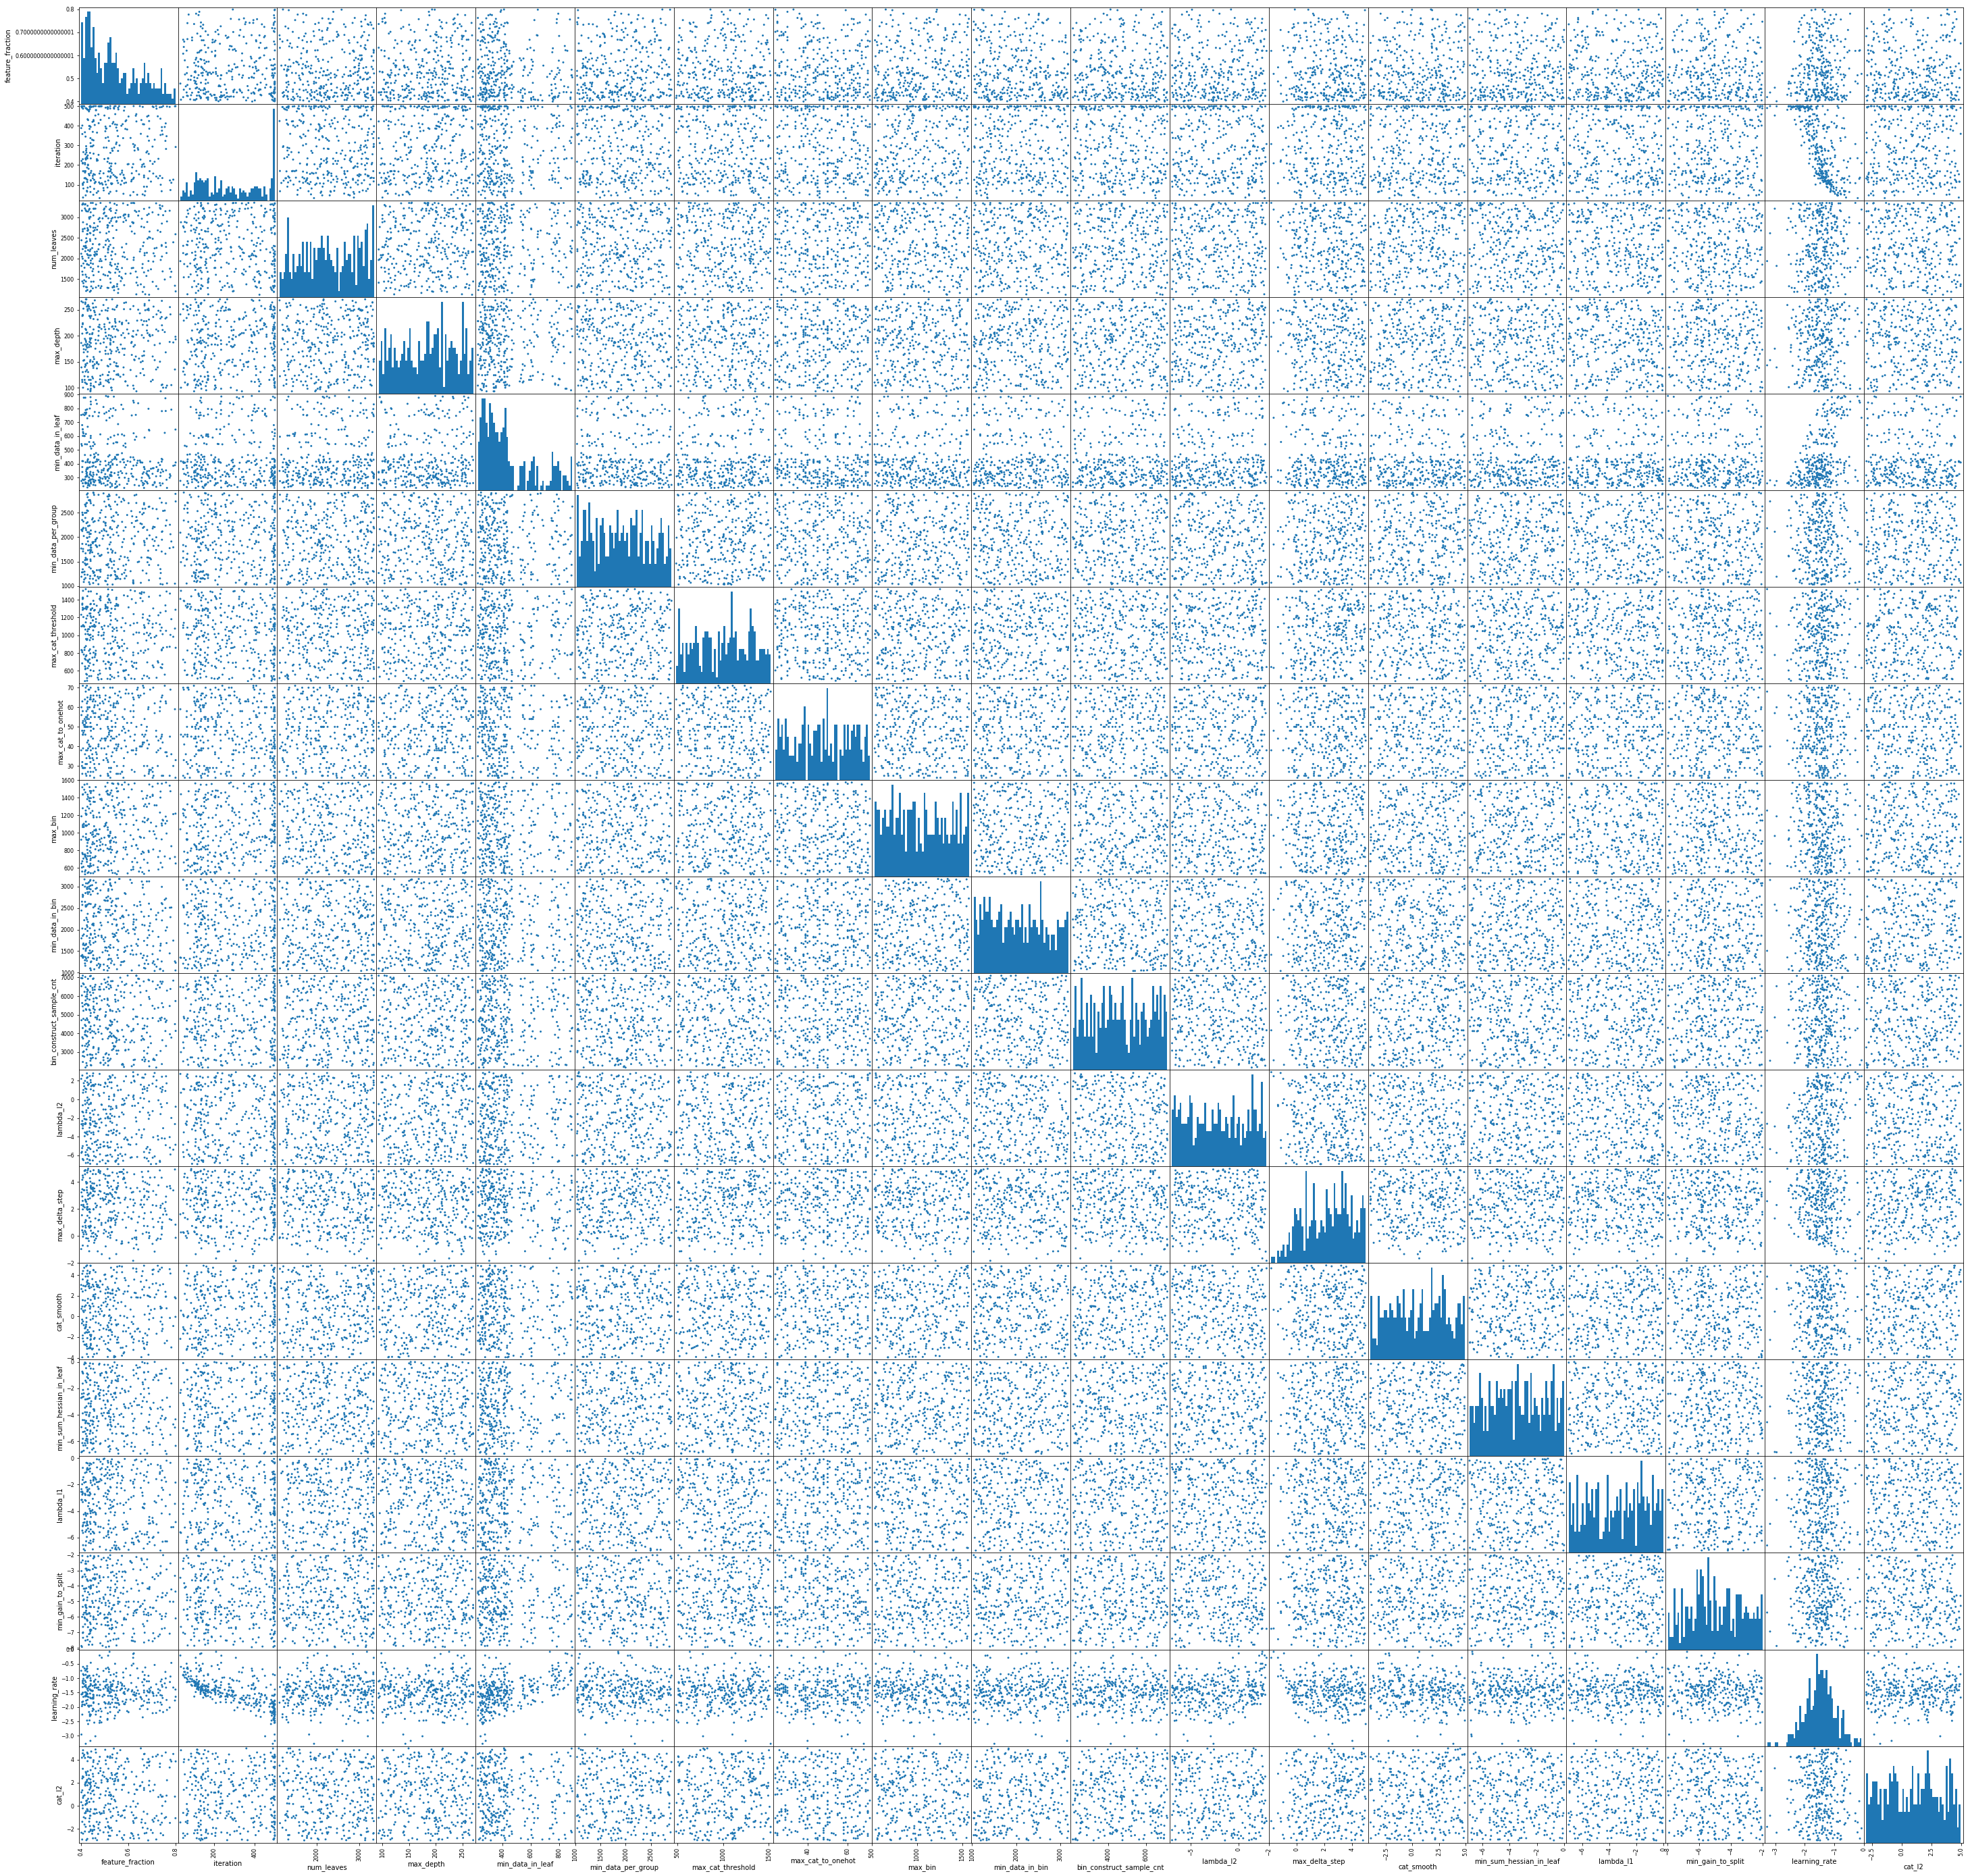

In [26]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns'),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [27]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable'], errors='ignore')\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bin_construct_sample_cnt  2.163000e+03   7105.000000
param_cat_l2                    1.045215e-03  92275.929940
param_cat_smooth                1.097054e-04  84713.298544
param_feature_fraction          4.002393e-01      0.799191
param_lambda_l1                 1.032764e-07      0.943474
param_lambda_l2                 1.098318e-07    855.967793
param_learning_rate             5.257423e-04      0.828436
param_max_bin                   5.270000e+02   1577.000000
param_max_cat_threshold         4.850000e+02   1520.000000
param_max_cat_to_onehot         2.400000e+01     71.000000
param_max_delta_step            1.435717e-02  98477.748078
param_max_depth                 9.300000e+01    270.000000
param_min_data_in_bin           1.038000e+03   3178.000000
param_min_data_in_leaf          2.260000e+02    891.000000
param_min_data_per_group        1.032000e+03   2913.000000
param_min_gain_to_split         1.097170e-08      0.009799
param_min_sum_hessian_in_leaf   1.105125e-07      0.991627
param_num_leaves                1.121000e+03   3355.000000

In [28]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(1819000, 51)

In [29]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(3638, 49)

In [30]:
limited_best_iteration.min_whole_validation_auc.describe()

count    3638.000000
mean        0.782853
std         0.033613
min         0.647023
25%         0.784994
50%         0.791435
75%         0.793514
max         0.812227
Name: min_whole_validation_auc, dtype: float64

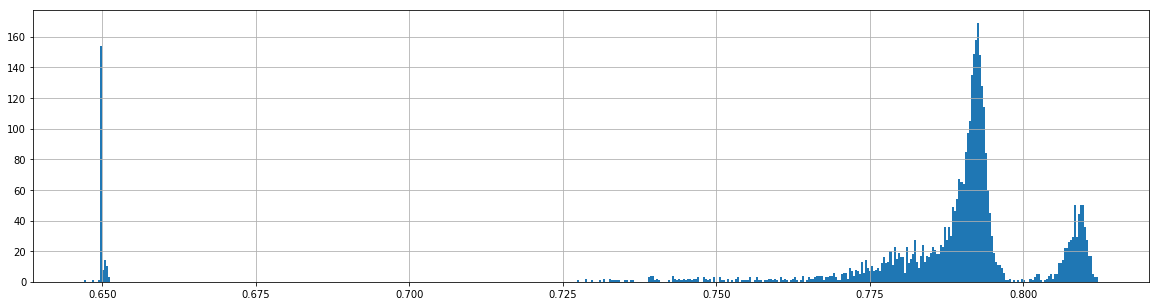

In [39]:
limited_best_iteration.min_whole_validation_auc.hist(bins=500);

In [31]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [32]:
limited_bad.shape

(0, 49)

In [33]:
limited_bad.groupby(SET_PARAMETERS).size()

Series([], dtype: int64)

In [34]:
limited_best_iteration.groupby(SET_PARAMETERS).min_whole_validation_auc.describe()

count      mean       std       min       25%  \
param_boost_from_average                                                   
False                     1820.0  0.789888  0.013114  0.728669  0.785566   
True                      1818.0  0.775811  0.044611  0.647023  0.784134   

                              50%       75%       max  
param_boost_from_average                               
False                     0.79192  0.794195  0.811288  
True                      0.79098  0.792877  0.812227

### single best parameter set

In [35]:
single_best = best.iloc[0]

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(single_best)

cnt                                                                           3
experiment_id                                                               112
file                                    ./experiments/bagging-switch-narrow.pkl
iteration                                                                   266
max_dev_auc                                                            0.833459
max_dev_binary_logloss                                                  0.54042
max_validation_auc                                                     0.797454
max_validation_binary_logloss                                          0.545406
max_whole_train_auc                                                    0.846818
max_whole_train_binary_logloss                                          0.49037
max_whole_validation_auc                                               0.810884
max_whole_validation_binary_logloss                                    0.534558
mean_dev_auc                            

In [37]:
# todo generate 1% neighborhood around best parameter set